In [1]:

## Bagging 
    # 1. Random Forest Classifier
    # 2. Extra Tree Classifier
    # 3. Voting Classifier
    # 4. Hyperparameter Tuning

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/winequality-red.csv",sep=",")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
## lenght of class

In [7]:
len(df['quality'].unique())

6

In [8]:
df['quality'].nunique()

6

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
df.duplicated().sum()

240

In [12]:
X = df.drop("quality",axis=1)

In [13]:
y=df['quality']

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [16]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_train,y_train)

1.0

[Text(0.3864619406882146, 0.9761904761904762, 'X[10] <= 9.85\ngini = 0.64\nsamples = 1119\nvalue = [8, 37, 471, 455, 141, 7]'),
 Text(0.21476473175021987, 0.9285714285714286, 'X[6] <= 98.5\ngini = 0.476\nsamples = 451\nvalue = [4, 15, 300, 128, 4, 0]'),
 Text(0.13698328935795953, 0.8809523809523809, 'X[9] <= 0.575\ngini = 0.508\nsamples = 391\nvalue = [4, 14, 243, 126, 4, 0]'),
 Text(0.06436895338610378, 0.8333333333333334, 'X[6] <= 88.5\ngini = 0.419\nsamples = 172\nvalue = [3, 10, 127, 31, 1, 0]'),
 Text(0.037708883025505714, 0.7857142857142857, 'X[10] <= 9.075\ngini = 0.388\nsamples = 162\nvalue = [3, 10, 124, 24, 1, 0]'),
 Text(0.014072119613016711, 0.7380952380952381, 'X[0] <= 7.8\ngini = 0.7\nsamples = 10\nvalue = [1, 3, 2, 4, 0, 0]'),
 Text(0.007036059806508356, 0.6904761904761905, 'X[1] <= 0.605\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1, 0, 0, 0]'),
 Text(0.003518029903254178, 0.6428571428571429, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.010554089709762

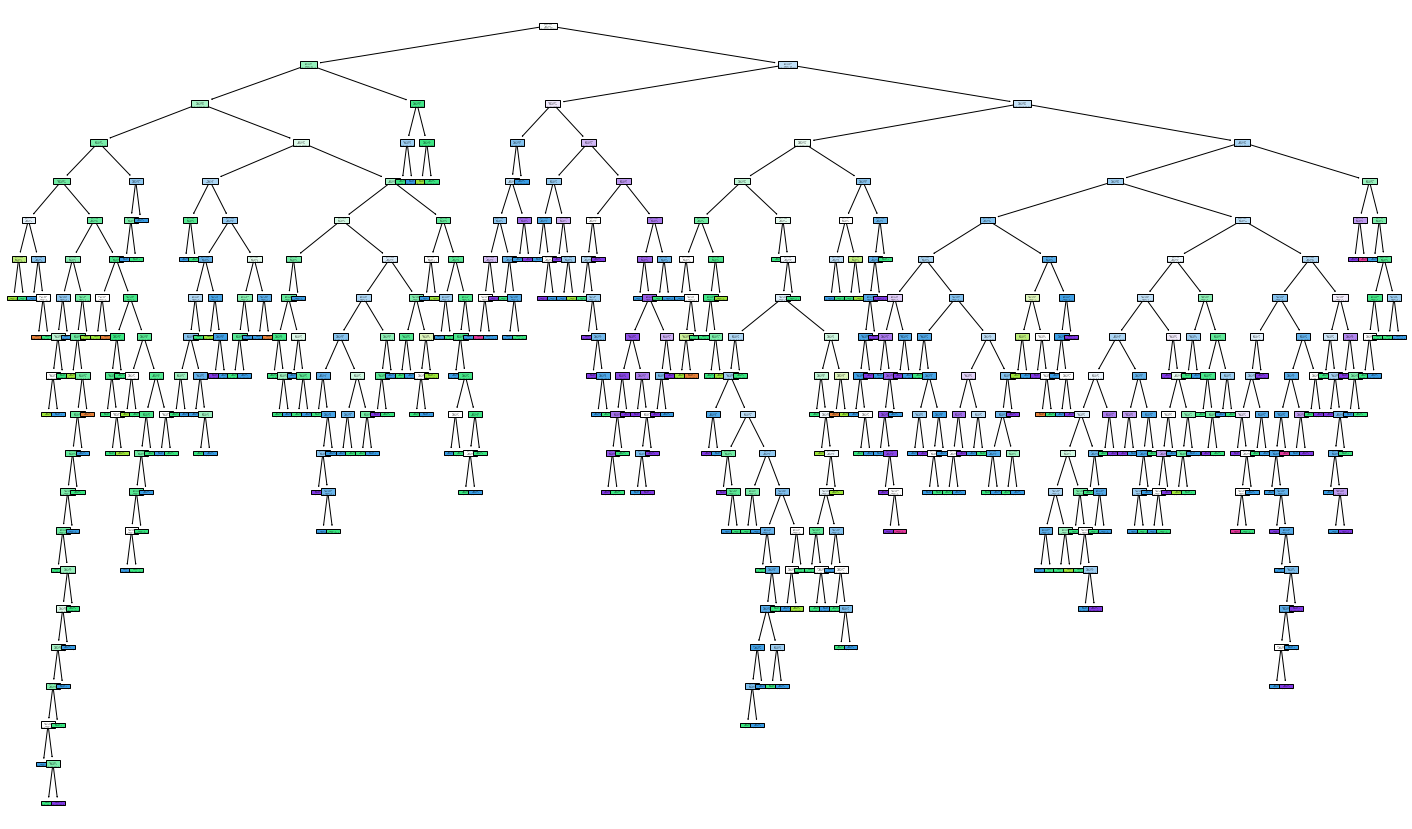

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [21]:
fig.savefig("decision_tree_classifier.png")

In [22]:
y_predict = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_predict)

0.625

In [25]:
## hyperparameter tuning

In [26]:
grid_param = {
    'criterion' :['gini','entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split' : range(2,8,1),
    'splitter' : ['best','random']
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_searh = GridSearchCV(estimator=model, param_grid=grid_param,cv=3,verbose=1)

In [28]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [29]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [30]:
model_with_best_params = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 5,
 min_samples_leaf= 2,
 min_samples_split =5,
 splitter= 'random')

In [31]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       splitter='random')

[Text(0.53125, 0.9166666666666666, 'X[7] <= 0.995\ngini = 0.64\nsamples = 1119\nvalue = [8, 37, 471, 455, 141, 7]'),
 Text(0.2784090909090909, 0.75, 'X[1] <= 0.514\ngini = 0.67\nsamples = 174\nvalue = [2, 9, 34, 83, 43, 3]'),
 Text(0.17045454545454544, 0.5833333333333334, 'X[0] <= 8.007\ngini = 0.606\nsamples = 93\nvalue = [0, 1, 9, 45, 36, 2]'),
 Text(0.09090909090909091, 0.4166666666666667, 'X[0] <= 6.181\ngini = 0.569\nsamples = 63\nvalue = [0, 1, 7, 37, 17, 1]'),
 Text(0.045454545454545456, 0.25, 'X[9] <= 0.631\ngini = 0.68\nsamples = 16\nvalue = [0, 0, 6, 6, 3, 1]'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.375\nsamples = 8\nvalue = [0, 0, 6, 2, 0, 0]'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.594\nsamples = 8\nvalue = [0, 0, 0, 4, 3, 1]'),
 Text(0.13636363636363635, 0.25, 'X[3] <= 2.776\ngini = 0.475\nsamples = 47\nvalue = [0, 1, 1, 31, 14, 0]'),
 Text(0.11363636363636363, 0.08333333333333333, 'gini = 0.439\nsamples = 41\nvalue = [0, 1, 1, 29, 

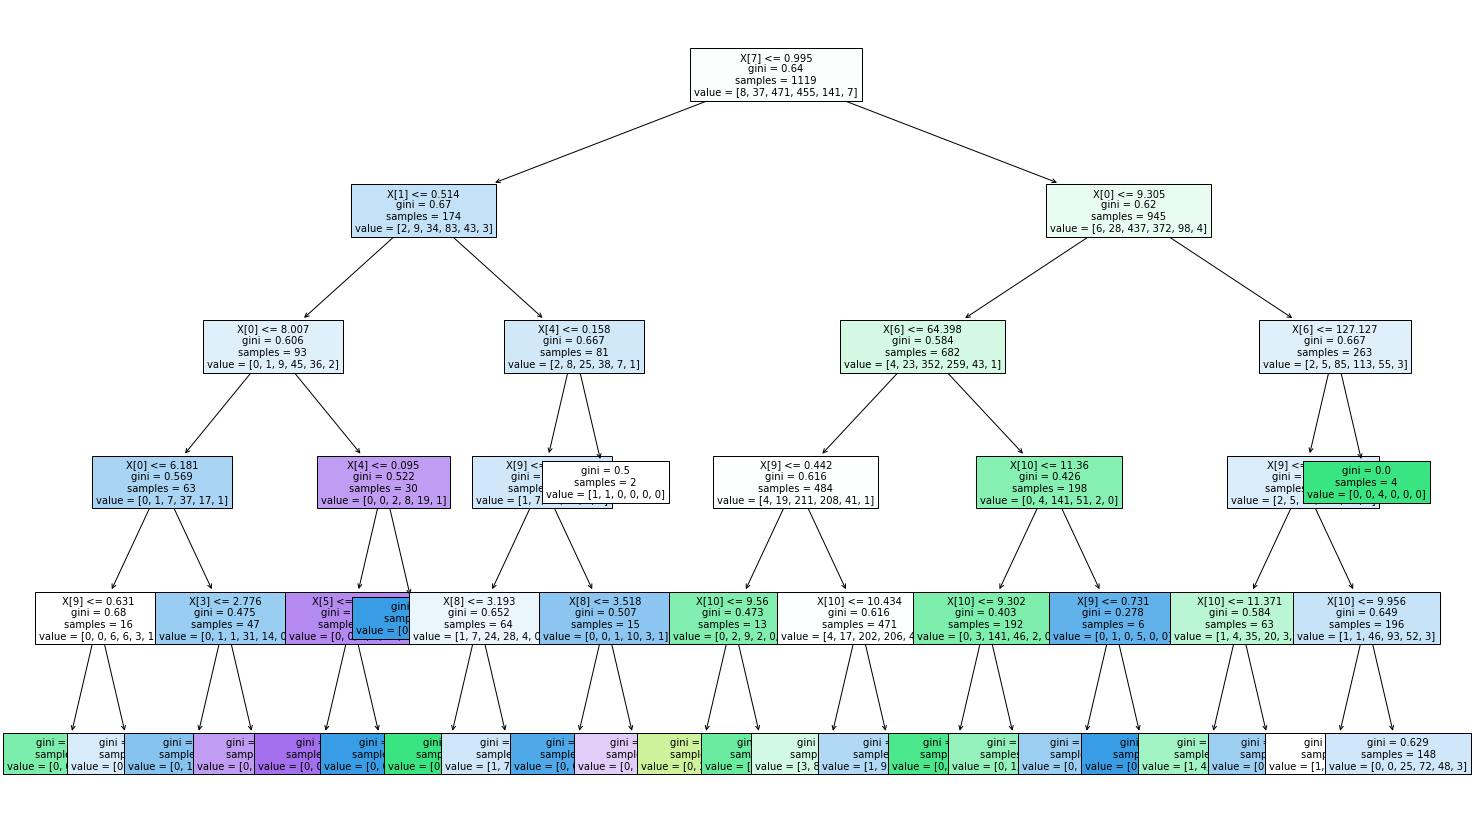

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [33]:
y_prediction2 = model_with_best_params.predict(X_test)

In [34]:
accuracy_score(y_test,y_prediction2)

0.56875

In [35]:
#logistic regression, svm, going forw(rf,xb,gb,ab)

In [36]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()

In [37]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred_rf = Rf_model.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred_rf)

0.6708333333333333

In [40]:
#we are tuning three hyperparameters right now , we are passing the different values for both parameters

In [41]:
grid_param ={
    'n_estimators' :[90,100,115,130],
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features' : ['auto','log2']
}

In [42]:
from sklearn.model_selection import GridSearchCV
grid_search1 = GridSearchCV(estimator=Rf_model,param_grid = grid_param,cv=3, verbose=2,n_jobs=-1)

In [43]:
# grid_search1.fit(X_train,y_train)

In [46]:
# grid_search1.best_params_

In [45]:
Rf_model_with_best_params = RandomForestClassifier()

In [48]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [49]:
Rf_model_with_best_params.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=115)

In [50]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [51]:
accuracy_score(y_test,y_predict_rf_bp)

0.65

In [52]:
# Bagging SVC 

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [54]:
model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50,random_state=0).fit(X_train,y_train)

In [55]:
y_predict_bagging=model_bagging_svc.predict(X_test)

In [56]:
accuracy_score(y_test,y_predict_bagging)

0.4666666666666667

In [57]:
# Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.datasets import make_classification

In [65]:
etc = ExtraTreesClassifier()

In [66]:
etc_model = etc.fit(X_train,y_train)

In [67]:
etc_y_pred = etc_model.predict(X_test)

In [68]:
accuracy_score(etc_y_pred,y_test)

0.6541666666666667

In [69]:
# Voting Classifier

In [70]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [71]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [72]:
eclf1 = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)],voting='hard')

In [73]:
eclf1 = eclf1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
voting_model = eclf1.predict(X_test)

In [75]:
accuracy_score(voting_model,y_test)

0.5833333333333334